# Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)
## Despliegue

### Emiliano V - A01707035

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

path = "./card_data/"

test_dir = os.path.join(path, 'test')

test_datagen = ImageDataGenerator(1./255)

test_generator = test_datagen.flow_from_directory(
							test_dir,
							target_size = (224, 224),
							batch_size = 20,
							class_mode ='categorical',
                            shuffle = False)


Found 265 images belonging to 53 classes.


In [16]:
model = load_model('models/MobileNetV3_card_classifier.h5') # Cargamos el modelo

In [17]:
test_loss, test_acc = model.evaluate(test_generator, steps = 2)
print('Test accuracy:', test_acc)

2/2 [==============================] - 2s 251ms/step - loss: 0.0446 - accuracy: 0.9750
Test accuracy: 0.9750000238418579


In [18]:
labels = list(test_generator.class_indices) # Creamos una lista con los nombres de cada clase

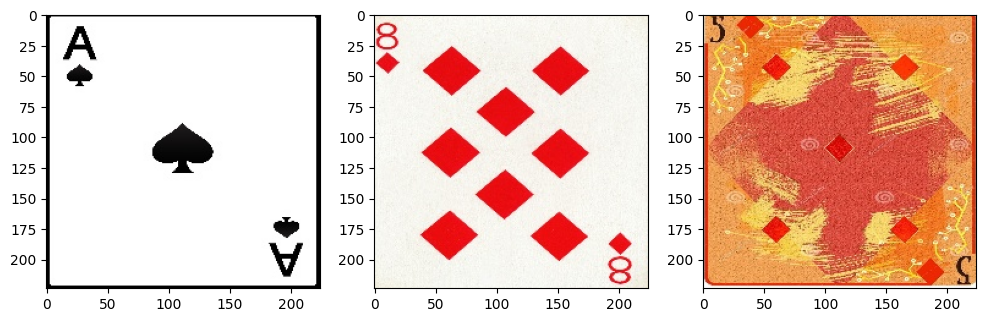

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(12, 12))

test_images = []

for i in range(3):
    # Seleccionamos una imagen aleatoria del batch
    random_index = np.random.randint(0, 19)
    batch = next(test_generator)

    test_image = batch[0][random_index]
    ax[i].imshow(test_image.astype('uint8'))

    test_images.append(test_image)

plt.show()

In [20]:
label_predictions = []

for i in range(len(test_images)):
    test_image = np.expand_dims(test_images[i], axis = 0)

    prediction = model.predict(test_image)
    prediction_index = np.argmax(prediction)
    label_predictions.append(labels[prediction_index])


1/1 [==============================] - 0s 59ms/step


In [21]:
print('Label predictions (in order):', label_predictions)

Label predictions (in order): ['ace of spades', 'eight of diamonds', 'five of diamonds']
